## Build a simple trading strategy 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Munging the stock data and add two columns - MA10 and MA50

In [2]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
fb = pd.DataFrame.from_csv('../data/facebook.csv')
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


In [3]:
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA200'] = ms['Close'].rolling(200).mean()
ms = ms.dropna()
ms.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA200
Date,,,,,,,,
2015-10-15,47.009998,47.029999,46.529999,47.009998,44.247669,27189400,46.789000,44.81560
2015-10-16,47.020000,47.540001,46.900002,47.509998,44.718285,26450300,46.983000,44.82090
2015-10-19,47.419998,47.880001,47.020000,47.619999,44.821823,29387600,47.081999,44.82520
2015-10-20,47.439999,47.810001,47.020000,47.770000,44.963005,30574000,47.183999,44.83240
2015-10-21,47.919998,47.990002,47.110001,47.200001,44.426506,25144300,47.224000,44.84015


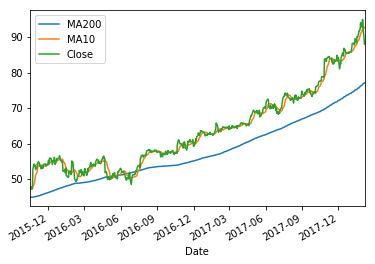

In [4]:
ms['MA200'].plot(legend=True)
ms['MA10'].plot(legend=True)
ms['Close'].plot(legend=True)

### 2. Add "Shares" column to make decisions base on the strategy 

In [16]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

ms['Shares'] = [1 if ms.loc[ei, 'MA10']>ms.loc[ei, 'MA200'] else 0 for ei in ms.index]

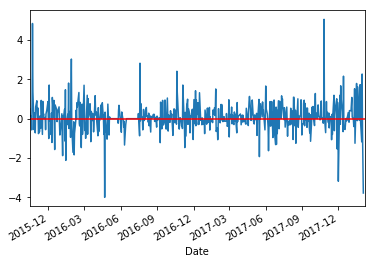

In [17]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='red')

In [22]:
ms[['Open','Close']]

,Open,Close
Date,,
2015-10-15,47.009998,47.009998
2015-10-16,47.020000,47.509998
2015-10-19,47.419998,47.619999
2015-10-20,47.439999,47.770000
2015-10-21,47.919998,47.200001
2015-10-22,47.529999,48.029999
2015-10-23,52.299999,52.869999
2015-10-26,52.529999,54.250000
2015-10-27,53.990002,53.689999


### 3. Use .cumsum() to display our model's performance if we follow the strategy 

In [18]:
#Use .cumsum() to calculate the accumulated wealth over the period

ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA200,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,76.50885,1,95.010002,2.270004,41.810002
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,76.65650,1,94.260002,-0.750000,41.060002
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,76.80085,1,91.779999,-2.480003,38.579999
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,76.93455,1,88.000000,-3.779999,34.800000
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,77.04705,1,NaN,NaN,NaN


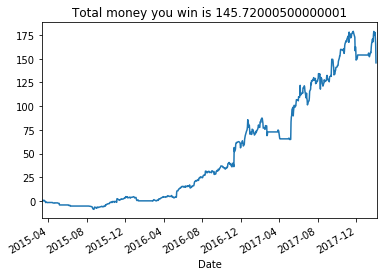

In [12]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

## You can create your own simple trading strategy by copying the codes above and modify the codes accordingly using the data of Microsoft (microsoft.csv).